In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [161]:
df = pd.read_csv('netflix_titles.csv')
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [162]:
len(df.loc[df['country'] == 'South Korea'])

199

In [163]:
country_list = df[~df['country'].isnull()]['country']
dict = {}
for i in country_list:
    cand = i.strip().split(', ')
    for j in cand:
        dict[j] = dict.get(j, 0) + 1

a = sorted(dict.items(), key=lambda x: x[1], reverse=True)[0]
country = a[0]
count = a[1]
print(f"가장 많은 작품이 올라간 국가는 {country}이며, 총 {count}개의 작품이 있습니다.")

가장 많은 작품이 올라간 국가는 United States이며, 총 3689개의 작품이 있습니다.


비트코인!

In [197]:
def make_date_set(data):
    data = pd.read_csv('Bitcoin.csv')
    data['Date'] = pd.to_datetime(data['Date'])
    
    data = data.sort_values('Date')
    data = data.reset_index(drop=True)
    
    start_date = '2016-06-01'
    end_date = '2017-06-30'

    mask = (data['Date'] >= start_date) & (data['Date'] <= end_date)
    filtered_data = data[mask]
    
    filtered_data['MA'] = filtered_data['Open'].rolling(window=5).mean()
    
    return filtered_data

In [198]:
df = pd.read_csv('Bitcoin.csv')
filterd_df = make_date_set(df)

eth = pd.read_csv('ETH_day.csv')
filterd_eth = make_date_set(eth)

/var/folders/6x/b_rnsm8n6k96drfm97jqr_d00000gn/T/ipykernel_1270/2304054036.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['MA'] = filtered_data['Open'].rolling(window=5).mean()
/var/folders/6x/b_rnsm8n6k96drfm97jqr_d00000gn/T/ipykernel_1270/2304054036.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['MA'] = filtered_data['Open'].rolling(window=5).mean()


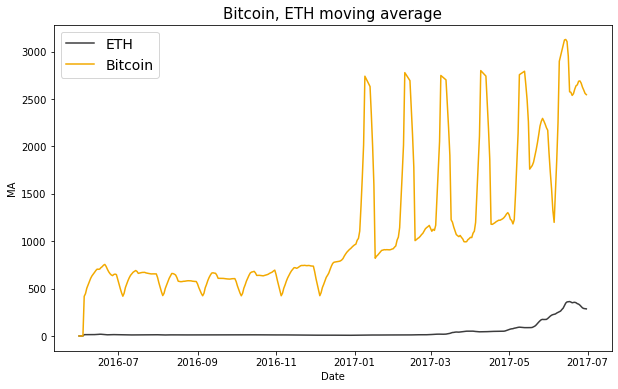

In [200]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=filtered_eth,
    x='Date',
    y='MA',
    color='#3c3c3d',
    label='ETH'
)

sns.lineplot(
    data=filtered_df,
    x='Date',
    y='MA',
    color='#f2a900',
    label='Bitcoin'
)
plt.title('Bitcoin, ETH moving average', size=15)
plt.legend(fontsize=14)
plt.show()